<a href="https://colab.research.google.com/github/SHESHAL01/ML_CW_2425422/blob/main/ML_CW_2425422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# TASK 01
file_path = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Course Work/WA_Fn-UseC_-Telco-Customer-Churn.csv"
dataSet = pd.read_csv(file_path)

In [4]:
# Data set overview
print("\nColumn Names:\n", dataSet.columns.tolist())

print("\nData Types of Columns:")
print(dataSet.dtypes)

print("\nSample Rows:")
print(dataSet.head())

print("Shape of The Data Set:", dataSet.shape)


Column Names:
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types of Columns:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Sample Rows:
   customerID  gende

In [5]:
#Missing value Analysis
print('\nNumber of Unique values in each column:\n')
print(dataSet.nunique())

print('\nNumber of null values in each column:\n')
print(dataSet.isnull().sum())

# Check for empty strings in TotalCharges
print("\nUnique values in TotalCharges:", dataSet["TotalCharges"].unique()[:10])

# Convert TotalCharges to numeric (fixes missing/invalid values)
dataSet["TotalCharges"] = pd.to_numeric(dataSet["TotalCharges"], errors="coerce")

# Check new missing values after conversion
print("\nMissing after conversion:", dataSet["TotalCharges"].isna().sum())


Number of Unique values in each column:

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Number of null values in each column:

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
Paymen

In [6]:
#Summary Statistics
print('\nSummery for Numerical Data:')
print(dataSet.describe())

print('\nSummery for Categorical Data:')
print(dataSet.describe(include='object'))


Summery for Numerical Data:
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Summery for Categorical Data:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361       

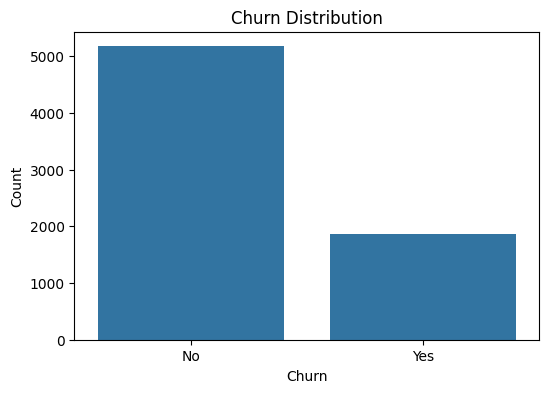


Class distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [7]:
#Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=dataSet)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print("\nClass distribution:")
print(dataSet["Churn"].value_counts())
print(dataSet["Churn"].value_counts(normalize=True))

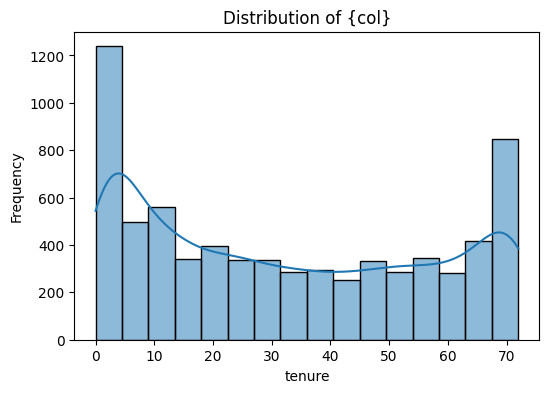

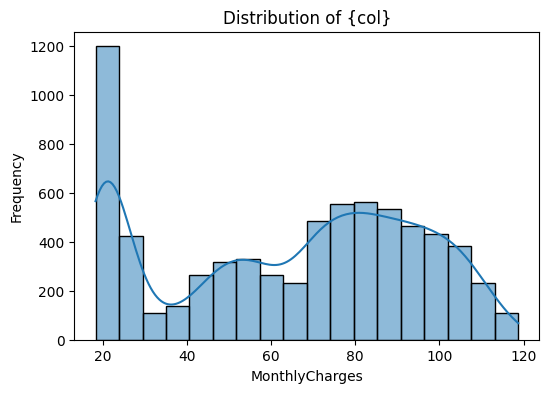

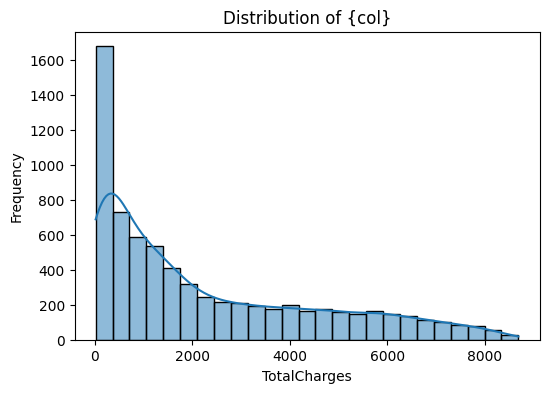

In [8]:
#Numerical Feature Visualisation

n_col = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in n_col:
    plt.figure(figsize=(6, 4))
    sns.histplot(data = dataSet, x=col, kde=True)
    plt.title('Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


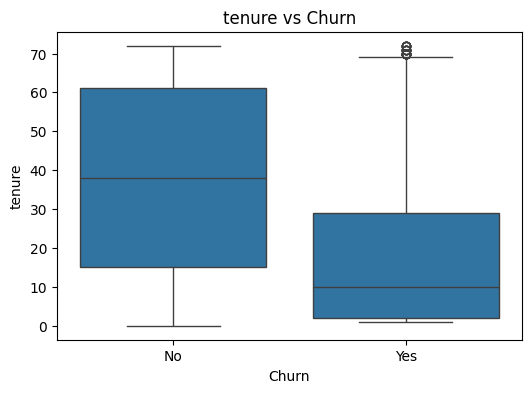

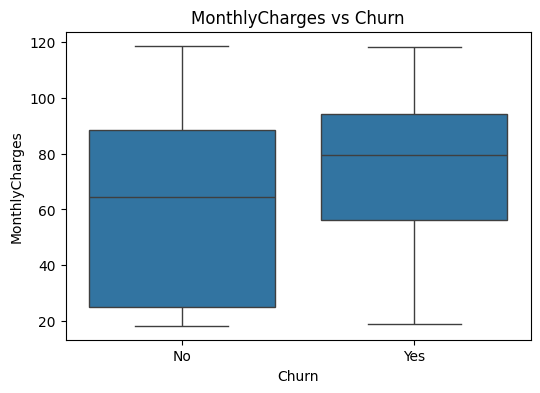

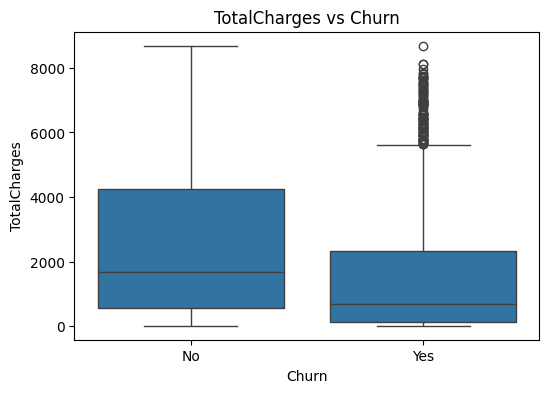

In [9]:
#
for col in n_col:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=dataSet, x="Churn", y=col)
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn")
    plt.ylabel(col)
    plt.show()

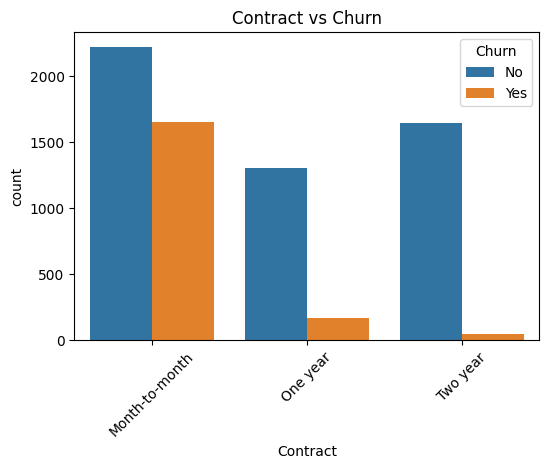

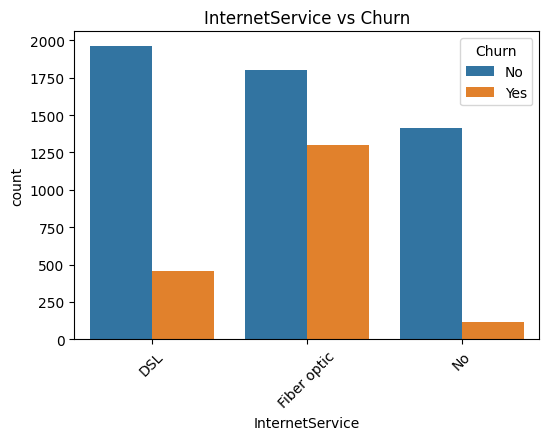

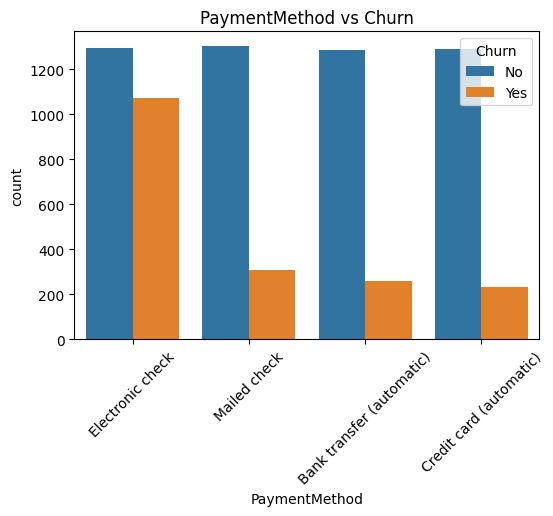

In [10]:
#Categorical Feature visualization

important_cols =["Contract", "InternetService", "PaymentMethod"]

for col in important_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=dataSet,hue="Churn")
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

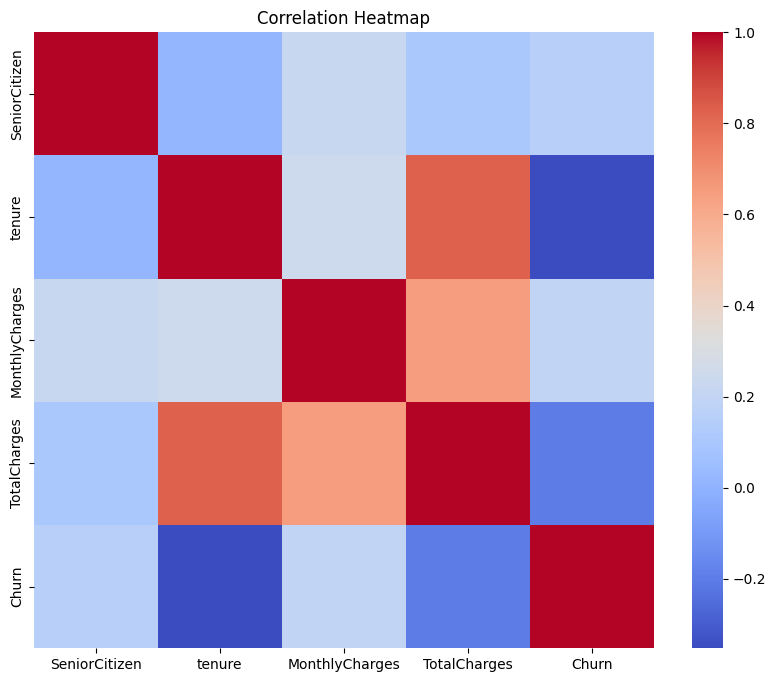

In [11]:
#Correlation Heat Map
dataSet['Churn'] = dataSet['Churn'].map({'Yes': 1, 'No': 0})
corr_matrix = dataSet.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()